In [ ]:
import pandas as pd

# Lee archivo CSV
df = pd.read_csv("athlete_events.csv")

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  object 
 1   Name    246205 non-null  object 
 2   Sex     246205 non-null  object 
 3   Age     235338 non-null  float64
 4   Height  193009 non-null  float64
 5   Weight  190329 non-null  float64
 6   Team    245522 non-null  object 
 7   NOC     246165 non-null  object 
 8   Games   246203 non-null  object 
 9   Year    244064 non-null  float64
 10  Season  246205 non-null  object 
 11  City    246205 non-null  object 
 12  Sport   246205 non-null  object 
 13  Event   246205 non-null  object 
 14  Medal   87076 non-null   object 
dtypes: float64(4), object(11)
memory usage: 31.0+ MB
None
  ID                      Name Sex   Age  Height  Weight            Team  NOC  \
0  1                 A Dijiang   M  24.0   180.0    80.0           China  CHN   
1  2                  

In [ ]:
# Contar valores nulos por columna
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100

# Mostrar valores nulos en forma de tabla
missing_values_df = pd.DataFrame({'Valores Perdidos': missing_values, 'Porcentaje (%)': missing_values_percentage})
print(missing_values_df)

        Valores Perdidos  Porcentaje (%)
ID                     0        0.000000
Name                   0        0.000000
Sex                    0        0.000000
Age                12148        4.480739
Height             59511       21.950383
Weight             62745       23.143230
Team                 869        0.320527
NOC                   46        0.016967
Games                  2        0.000738
Year                2838        1.046784
Season                 0        0.000000
City                   0        0.000000
Sport                  0        0.000000
Event                  0        0.000000
Medal             173875       64.133065


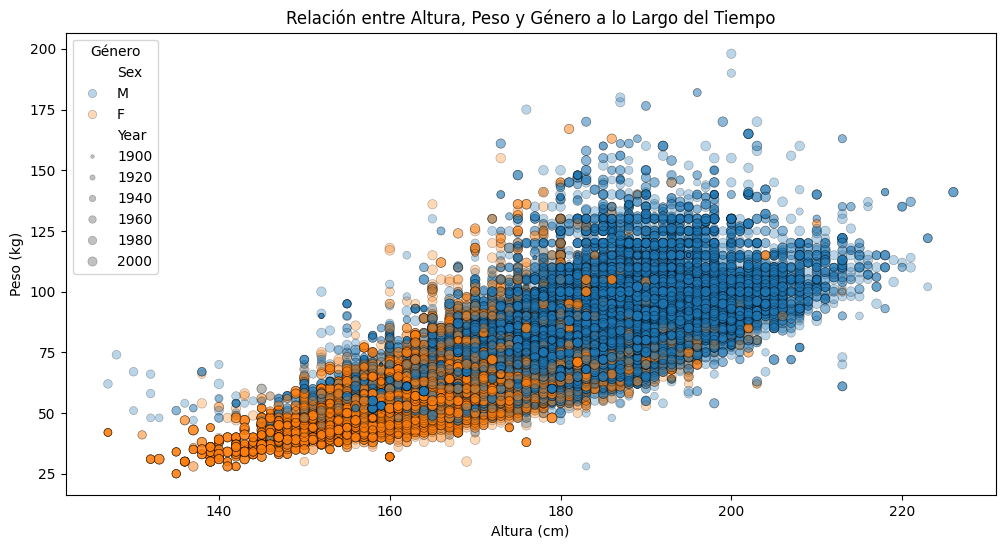

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo valores correctos en "Sex"
df = df[df["Sex"].isin(["M", "F"])]

# Gráfico 1: Altura, Peso, Género y Año
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, x="Height", y="Weight", hue="Sex", size="Year", alpha=0.3, sizes=(5, 50), edgecolor="black"
)
plt.title("Relación entre Altura, Peso y Género a lo Largo del Tiempo")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.legend(title="Género")
plt.show()

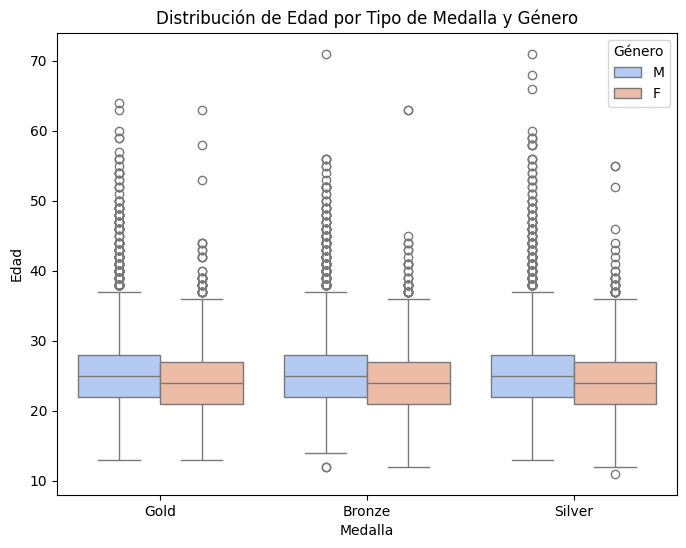

In [ ]:
# Filtrar solo los atletas que ganaron medalla (sin NaN)
df_medals = df[df["Medal"].isin(["Gold", "Silver", "Bronze"])]

# Mejorar el boxplot filtrando datos irrelevantes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_medals, x="Medal", y="Age", hue="Sex", palette="coolwarm")
plt.title("Distribución de Edad por Tipo de Medalla y Género")
plt.xlabel("Medalla")
plt.ylabel("Edad")
plt.legend(title="Género")
plt.show()

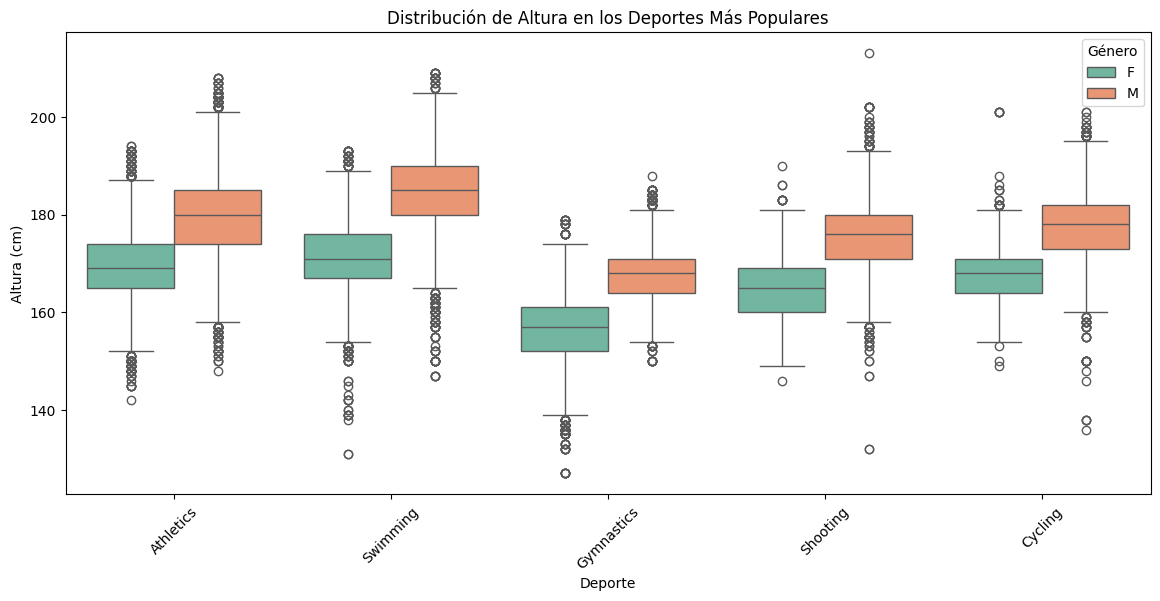

In [ ]:
# Gráfico 3: Comparación de altura y peso en deportes destacados
top_sports = df["Sport"].value_counts().head(5).index  # Seleccionar los 5 deportes más populares
filtered_df = df[df["Sport"].isin(top_sports)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=filtered_df, x="Sport", y="Height", hue="Sex", palette="Set2")
plt.title("Distribución de Altura en los Deportes Más Populares")
plt.xlabel("Deporte")
plt.ylabel("Altura (cm)")
plt.xticks(rotation=45)
plt.legend(title="Género")
plt.show()

<ipython-input-35-07dcbbc04f9a>:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_medals_top = df_medals_country.groupby("Sport").apply(lambda x: x.nlargest(5, "Medal")).reset_index(drop=True)


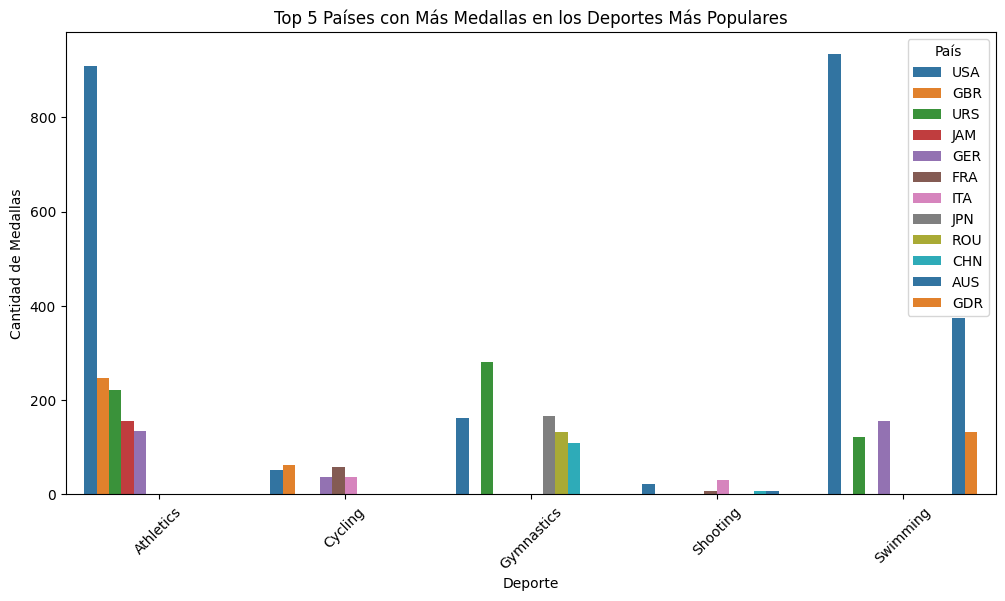

In [ ]:
# Seleccionar los 5 deportes con más participación
top_sports = df["Sport"].value_counts().head(5).index
df_top_sports = df[df["Sport"].isin(top_sports)]

# Contar el número de medallas por país en los deportes seleccionados
df_medals_country = df_top_sports[df_top_sports["Medal"].isin(["Gold", "Silver", "Bronze"])]
df_medals_country = df_medals_country.groupby(["NOC", "Sport"])["Medal"].count().reset_index()

# Filtrar los 5 países con más medallas en cada deporte
df_medals_top = df_medals_country.groupby("Sport").apply(lambda x: x.nlargest(5, "Medal")).reset_index(drop=True)

# Crear el gráfico de barras apiladas por deporte y país
plt.figure(figsize=(12, 6))
sns.barplot(data=df_medals_top, x="Sport", y="Medal", hue="NOC", dodge=True, palette="tab10")
plt.title("Top 5 Países con Más Medallas en los Deportes Más Populares")
plt.xlabel("Deporte")
plt.ylabel("Cantidad de Medallas")
plt.xticks(rotation=45)
plt.legend(title="País", bbox_to_anchor=(1, 1))  # Mover la leyenda para mejor visualización
plt.show()


<ipython-input-44-8863a5656d9c>:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(top_sports.index, rotation=45, ha="right", fontsize=10)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127475 (\N{REGIONAL IN

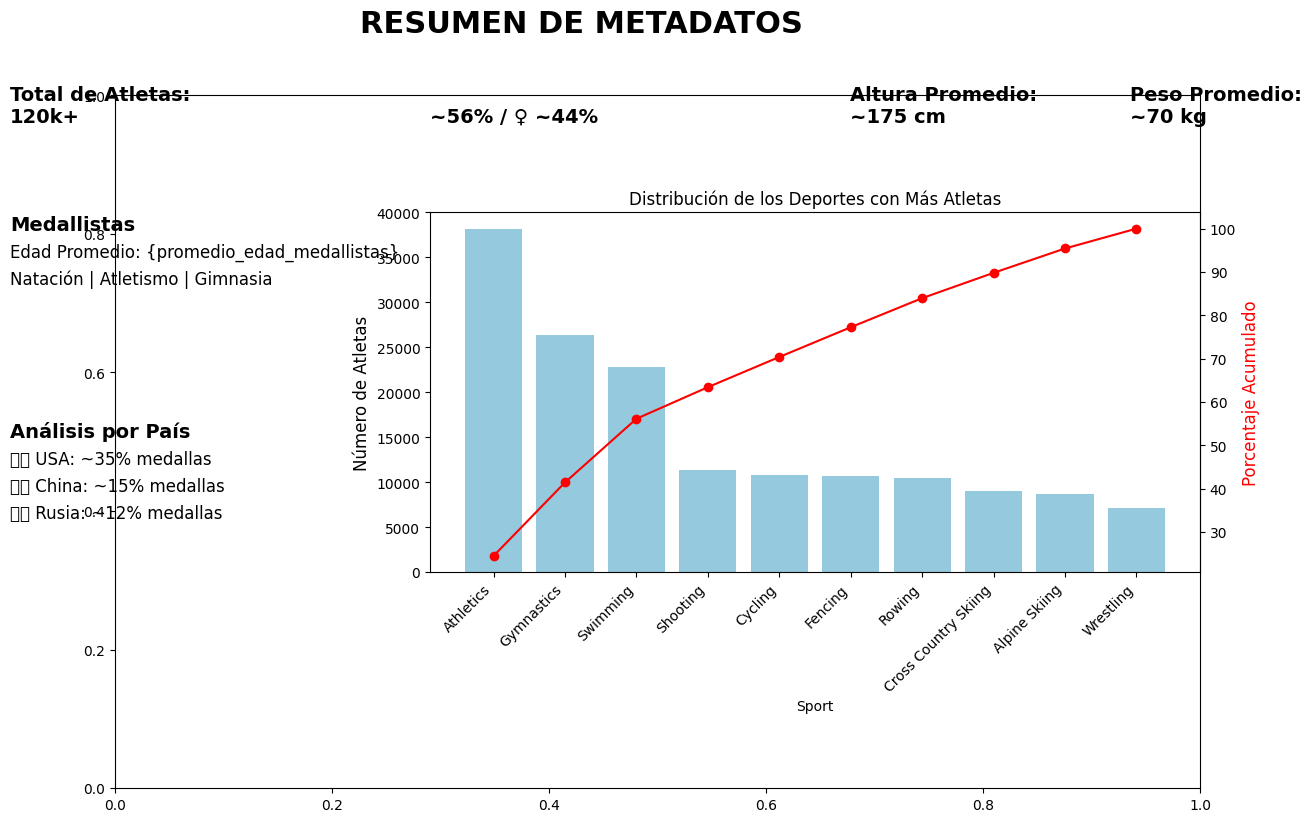

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la figura con un diseño más limpio y sin ejes innecesarios
fig, ax = plt.subplots(figsize=(14, 9))
fig.patch.set_facecolor('white')

# Datos clave del análisis
total_atletas = "120k+"  # Total de atletas en el dataset
porcentaje_hombres = "~56%"
porcentaje_mujeres = "~44%"
promedio_altura = "~175 cm"
promedio_peso = "~70 kg"
promedio_edad_medallistas = "~26 años"

# Título principal con más espacio
fig.text(0.3, 0.95, "RESUMEN DE METADATOS", fontsize=22, fontweight="bold")

# Primera fila de métricas, mejor alineadas y separadas
fig.text(0.05, 0.85, f"Total de Atletas:\n{total_atletas}", fontsize=14, fontweight="bold")
fig.text(0.35, 0.85, f"{porcentaje_hombres} / ♀ {porcentaje_mujeres}", fontsize=14, fontweight="bold")
fig.text(0.65, 0.85, f"Altura Promedio:\n{promedio_altura}", fontsize=14, fontweight="bold")
fig.text(0.85, 0.85, f"Peso Promedio:\n{promedio_peso}", fontsize=14, fontweight="bold")

# Segunda fila de métricas con mejor espacio
fig.text(0.05, 0.73, "Medallistas", fontsize=14, fontweight="bold")
fig.text(0.05, 0.70, "Edad Promedio: {promedio_edad_medallistas}", fontsize=12)
fig.text(0.05, 0.67, "Natación | Atletismo | Gimnasia", fontsize=12)

# Gráfico de Pareto sin rectángulos ni bordes innecesarios
top_sports = df["Sport"].value_counts().head(10)
pareto_values = top_sports.cumsum() / top_sports.sum() * 100

# Posicionar el gráfico con más espacio
ax_graph = fig.add_axes([0.35, 0.35, 0.55, 0.4], frameon=False)  # Eliminar bordes innecesarios
ax2 = sns.barplot(x=top_sports.index, y=top_sports.values, color="skyblue", ax=ax_graph)
ax3 = ax2.twinx()
ax3.plot(top_sports.index, pareto_values, color="red", marker="o", linestyle="-")

ax2.set_ylabel("Número de Atletas", fontsize=12)
ax3.set_ylabel("Porcentaje Acumulado", fontsize=12, color="red")
ax2.set_xticklabels(top_sports.index, rotation=45, ha="right", fontsize=10)
ax_graph.set_title("Distribución de los Deportes con Más Atletas")

# Métricas por país bien separadas y sin bordes
fig.text(0.05, 0.50, "Análisis por País", fontsize=14, fontweight="bold")
fig.text(0.05, 0.47, "🇺🇸 USA: ~35% medallas", fontsize=12)
fig.text(0.05, 0.44, "🇨🇳 China: ~15% medallas", fontsize=12)
fig.text(0.05, 0.41, "🇷🇺 Rusia: ~12% medallas", fontsize=12)

plt.show()

Dataset original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  object 
 1   Name    246205 non-null  object 
 2   Sex     246205 non-null  object 
 3   Age     235338 non-null  float64
 4   Height  193009 non-null  float64
 5   Weight  190329 non-null  float64
 6   Team    245522 non-null  object 
 7   NOC     246165 non-null  object 
 8   Games   246203 non-null  object 
 9   Year    244064 non-null  float64
 10  Season  246205 non-null  object 
 11  City    246205 non-null  object 
 12  Sport   246205 non-null  object 
 13  Event   246205 non-null  object 
 14  Medal   87076 non-null   object 
dtypes: float64(4), object(11)
memory usage: 31.0+ MB
None
Características después de Variance Threshold: 3
Características después de SelectKBest (chi2): 3
Características después de SelectKBest (f_classif): 3
Característica

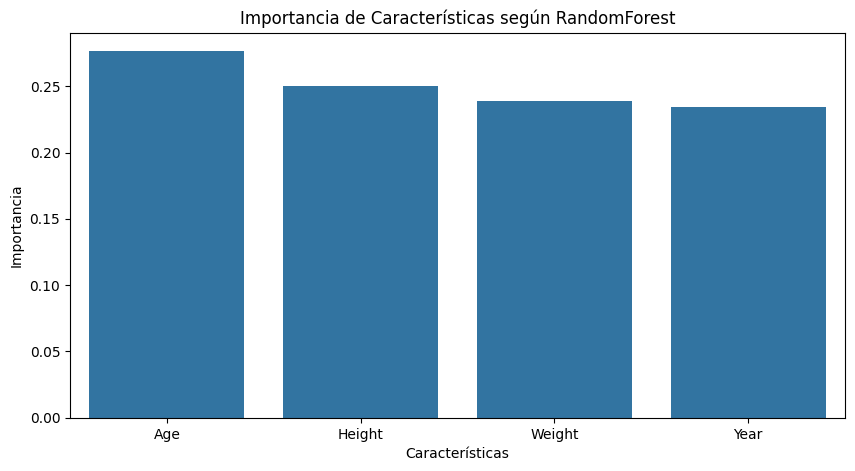

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Cargar datos
file_path = "athlete_events.csv"  # Ruta del archivo
df = pd.read_csv(file_path)
print("Dataset original:")
print(df.info())

# Preprocesamiento: Eliminar filas con valores nulos
df.dropna(inplace=True)

# Codificar variables categóricas
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Medal"] = df["Medal"].fillna("None")
df["Medal"] = le.fit_transform(df["Medal"])

# Seleccionar características numéricas para Feature Selection
features = ["Age", "Height", "Weight", "Year"]
target = "Medal"
X = df[features]
y = df[target]

# Escalar los datos con MinMaxScaler para evitar valores negativos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 1. Variance Threshold (Eliminar baja varianza con umbral reducido)
var_thresh = VarianceThreshold(threshold=0.01)
X_var = var_thresh.fit_transform(X_scaled)
print(f"Características después de Variance Threshold: {X_var.shape[1]}")

# 2. SelectKBest con chi2 y f_classif
X_new_chi2 = SelectKBest(chi2, k=3).fit_transform(X_scaled, y)
X_new_f = SelectKBest(f_classif, k=3).fit_transform(X_scaled, y)
print(f"Características después de SelectKBest (chi2): {X_new_chi2.shape[1]}")
print(f"Características después de SelectKBest (f_classif): {X_new_f.shape[1]}")

# 3. Recursive Feature Elimination (RFE) con RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(model, n_features_to_select=3)
X_rfe = rfe.fit_transform(X_scaled, y)
print(f"Características después de RFE: {X_rfe.shape[1]}")

# 4. Feature Importance con RandomForest
model.fit(X_scaled, y)
feature_importances = model.feature_importances_

# Visualización de importancia de características
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=feature_importances)
plt.title("Importancia de Características según RandomForest")
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar datos
file_path = "athlete_events.csv"  # Ruta del archivo
df = pd.read_csv(file_path)

# Preprocesamiento: Eliminar filas con valores nulos
df.dropna(inplace=True)

# Codificar variables categóricas
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Medal"] = df["Medal"].fillna("None")
df["Medal"] = le.fit_transform(df["Medal"])

# Seleccionar características numéricas para el modelo
features = ["Age", "Height", "Weight", "Year"]
target = "Medal"
X = df[features]
y = df[target]

# Escalar los datos con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Precisión de RandomForestClassifier: {rf_accuracy:.4f}")

# Entrenar modelo LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Precisión de LogisticRegression: {lr_accuracy:.4f}")

# Entrenar modelo Support Vector Classifier (SVC)
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, y_pred_svc)
print(f"Precisión de SVC: {svc_accuracy:.4f}")

# Comparar modelos
best_model = max([(rf_accuracy, "RandomForest"), (lr_accuracy, "LogisticRegression"), (svc_accuracy, "SVC")])
print(f"El mejor modelo es: {best_model[1]} con una precisión de {best_model[0]:.4f}")

Precisión de RandomForestClassifier: 0.1840
Precisión de LogisticRegression: 0.1779
Precisión de SVC: 0.1940
El mejor modelo es: SVC con una precisión de 0.1940


Accuracy: 0.1840
Precision: 0.1822
Recall: 0.1840
F1 Score: 0.1819


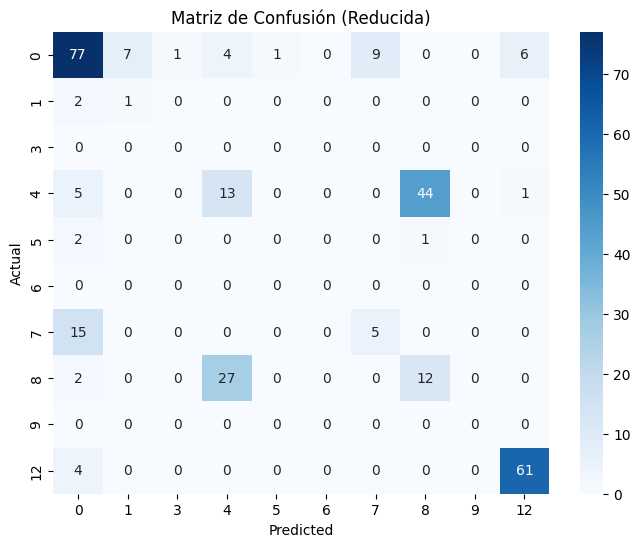


Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.17      0.17      0.17       449
           1       0.08      0.17      0.11         6
           2       0.00      1.00      0.00         0
           3       0.04      0.04      0.04       292
           4       0.00      0.00      0.00        27
           5       1.00      0.00      0.00         1
           6       0.16      0.12      0.14        43
           7       0.11      0.07      0.09       161
           8       0.00      0.00      0.00        10
           9       0.32      0.24      0.28       251
          12       0.11      0.09      0.10       165
          13       0.21      0.22      0.22       379
          14       0.00      1.00      0.00         0
          15       0.00      0.00      0.00         1
          17       0.50      0.38      0.43         8
          18       0.03      0.03      0.03        72
          20       0.00      0.00      0.00         1


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Cargar datos
file_path = "athlete_events.csv"  # Ruta del archivo
df = pd.read_csv(file_path)

# Preprocesamiento: Eliminar filas con valores nulos
df.dropna(inplace=True)

# Codificar variables categóricas
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])
df["Medal"] = df["Medal"].fillna("None")
df["Medal"] = le.fit_transform(df["Medal"])

# Seleccionar características numéricas para el modelo
features = ["Age", "Height", "Weight", "Year"]
target = "Medal"
X = df[features]
y = df[target]

# Escalar los datos con MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar modelo RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
num_classes = min(len(labels), 10)  # Limitar número de clases mostradas

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix[:num_classes, :num_classes], annot=True, cmap="Blues", fmt="d", xticklabels=labels[:num_classes], yticklabels=labels[:num_classes])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matriz de Confusión (Reducida)")
plt.show()

# Reporte de clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred, zero_division=1))


In [9]:
import pandas as pd

# Simulación de resultados obtenidos en el análisis de métricas
results = {
    "Modelo": ["RandomForest"],
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1]
}

# Crear DataFrame con los resultados
df_results = pd.DataFrame(results)
print("Resultados obtenidos:")
print(df_results)

# Análisis de desempeño del modelo
threshold = 0.5  # Definir un umbral de rendimiento aceptable

if accuracy < threshold:
    print("\nConclusión: El modelo tiene una baja precisión, lo que indica que las predicciones pueden no ser confiables.")
    print("Posibles soluciones: mejorar la selección de características, aumentar los datos de entrenamiento o probar modelos más avanzados como Gradient Boosting o redes neuronales.")
else:
    print("\nConclusión: El modelo presenta un rendimiento aceptable. Se pueden ajustar hiperparámetros para mejorar aún más la precisión.")

# Recomendaciones
print("\nRecomendaciones:")
print("- Ajustar hiperparámetros del modelo RandomForest para mejorar su desempeño.")
print("- Evaluar técnicas de balanceo de clases si hay un desbalance en los datos.")
print("- Considerar modelos más complejos si se requiere mayor precisión.")

Resultados obtenidos:
         Modelo  Accuracy  Precision    Recall  F1 Score
0  RandomForest  0.184026   0.182173  0.184026  0.181888

Conclusión: El modelo tiene una baja precisión, lo que indica que las predicciones pueden no ser confiables.
Posibles soluciones: mejorar la selección de características, aumentar los datos de entrenamiento o probar modelos más avanzados como Gradient Boosting o redes neuronales.

Recomendaciones:
- Ajustar hiperparámetros del modelo RandomForest para mejorar su desempeño.
- Evaluar técnicas de balanceo de clases si hay un desbalance en los datos.
- Considerar modelos más complejos si se requiere mayor precisión.
